In [1]:
#importing necessary packages

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [2]:
#loading data

data = pd.read_csv('NY property data.csv')

In [3]:
#first look at data

data.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [4]:
#removing unnecesary columns

columns_to_keep = ['RECORD','ZIP', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'LTFRONT', 'LTDEPTH', 'BLDFRONT', 'BLDDEPTH','TAXCLASS','B']
data = data[columns_to_keep]
data.head()

,RECORD,ZIP,STORIES,FULLVAL,AVLAND,AVTOT,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,TAXCLASS,B
0,1,10004.0,NaN,21400000.0,4225500.0,9630000.0,500,1046,0,0,4,1
1,2,10004.0,NaN,193800000.0,14310000.0,87210000.0,27,0,0,0,4,1
2,3,10004.0,3.0,104686000.0,39008700.0,47108700.0,709,564,709,564,4,1
3,4,10004.0,2.0,39200000.0,15255000.0,17640000.0,793,551,85,551,4,1
4,5,10004.0,1.0,272300000.0,121050000.0,122535000.0,323,1260,89,57,4,1


## Filling in missing values

**ZIP**

In [5]:
missing_zips = np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

29890

In [6]:
for i in range(len(missing_zips)):
    if(data.loc[missing_zips[i]+1,'ZIP']==data.loc[missing_zips[i]-1,'ZIP']):
        data.loc[missing_zips[i],'ZIP']=data.loc[missing_zips[i]-1,'ZIP']

In [7]:
missing_zips = np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

16437

In [8]:
for i in range(len(missing_zips)):
    data.loc[missing_zips[i],'ZIP'] = data.loc[missing_zips[i]-1,'ZIP']

In [9]:
missing_zips = np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

0

**STORIES**

In [10]:
temp = data[data['STORIES'].isnull()]
len(temp)

56264

In [11]:
temp['TAXCLASS'].value_counts()

1B    24736
4     22354
3      4635
2      3435
1       897
2C      138
2B       34
2A       30
1A        5
Name: TAXCLASS, dtype: int64

In [12]:
mean_stories = data.groupby('TAXCLASS')['STORIES'].mean()
print(mean_stories)

TAXCLASS
1      2.111641
1A     1.656837
1B     4.000000
1C     3.052748
1D     1.068966
2     16.095110
2A     2.844574
2B     4.004494
2C     4.745097
3      1.333333
4      5.446968
Name: STORIES, dtype: float64


In [13]:
len(data[data['STORIES']==0])

0

In [14]:
data['STORIES']=data['STORIES'].fillna(value=0)
for index in mean_stories.index:
    data.loc[(data['STORIES']==0) & (data['TAXCLASS']==index),'STORIES']=mean_stories[index]

**FULLVAL, AVLAND, AVTOT**

In [15]:
data['FULLVAL'].replace('NaN',0)
temp = data[data['FULLVAL']!=0]
mean_fullval = temp.groupby('TAXCLASS')['FULLVAL'].mean()
print(mean_fullval)

TAXCLASS
1     5.698435e+05
1A    3.352842e+05
1B    5.613639e+05
1C    7.615359e+05
1D    2.233614e+07
2     7.998018e+05
2A    8.640037e+05
2B    1.252989e+06
2C    7.728799e+05
3     1.112765e+05
4     3.211928e+06
Name: FULLVAL, dtype: float64


In [16]:
data['AVLAND'].replace('NaN',0)
temp_avland = data[data['AVLAND']!=0]
mean_avland = temp_avland.groupby('TAXCLASS')['AVLAND'].mean()

In [17]:
data['AVTOT'].replace('NaN',0)
temp_avtot = data[data['AVTOT']!=0]
mean_avtot = temp_avland.groupby('TAXCLASS')['AVTOT'].mean()

In [18]:
%%time
for index in mean_fullval.index:
    data.loc[(data['FULLVAL']==0)&(data['TAXCLASS']==index),'FULLVAL']=mean_fullval[index]
    data.loc[(data['AVLAND']==0)&(data['TAXCLASS']==index),'AVLAND']=mean_avland[index]
    data.loc[(data['AVTOT']==0)&(data['TAXCLASS']==index),'AVTOT']=mean_avtot[index]

CPU times: user 2.12 s, sys: 71.1 ms, total: 2.19 s
Wall time: 2.15 s


**LTFRONT, LTDEPTH, BLDFRONT, BLDDEPTH**

In [19]:
data.loc[data['LTFRONT']==0,'LTFRONT']=np.nan
data.loc[data['LTDEPTH']==0,'LTDEPTH']=np.nan
data.loc[data['BLDFRONT']==0,'BLDFRONT']=np.nan
data.loc[data['BLDDEPTH']==0,'BLDDEPTH']=np.nan

In [20]:
mean_LTFRONT = data.groupby(data['TAXCLASS'])['LTFRONT'].mean()
mean_LTDEPTH = data.groupby(data['TAXCLASS'])['LTDEPTH'].mean()
mean_BLDFRONT = data.groupby(data['TAXCLASS'])['BLDFRONT'].mean()
mean_BLDDEPTH = data.groupby(data['TAXCLASS'])['BLDDEPTH'].mean()

In [21]:
for index in mean_LTFRONT.index:
    data.loc[(data['LTFRONT'].isnull())&(data['TAXCLASS']==index),'LTFRONT']=mean_LTFRONT[index]
    data.loc[(data['LTDEPTH'].isnull())&(data['TAXCLASS']==index),'LTDEPTH']=mean_LTDEPTH[index]
    data.loc[(data['BLDFRONT'].isnull())&(data['TAXCLASS']==index),'BLDFRONT']=mean_BLDFRONT[index]
    data.loc[(data['BLDDEPTH'].isnull())&(data['TAXCLASS']==index),'BLDDEPTH']=mean_BLDDEPTH[index]

## Feature Engineering

In [22]:
data['ZIP'] = data['ZIP'].astype(str)
data['zip3'] = data['ZIP'].str[:3]

In [23]:
data['ltsize'] = data['LTFRONT'] * data['LTDEPTH']
data['bldsize'] = data['BLDFRONT'] * data['BLDDEPTH']
data['bldvol'] = data['bldsize'] * data['STORIES']

In [24]:
data['r1'] = data['FULLVAL'] / data['ltsize']
data['r2'] = data['FULLVAL'] / data['bldsize']
data['r3'] = data['FULLVAL'] / data['bldvol']
data['r4'] = data['AVLAND'] / data['ltsize']
data['r5'] = data['AVLAND'] / data['bldsize']
data['r6'] = data['AVLAND'] / data['bldvol']
data['r7'] = data['AVTOT'] / data['ltsize']
data['r8'] = data['AVTOT'] / data['bldsize']
data['r9'] = data['AVTOT'] / data['bldvol']

In [25]:
ninevars = ['r1','r2','r3','r4','r5','r6','r7','r8','r9']
zip5_mean = data.groupby('ZIP')[ninevars].mean()
zip3_mean = data.groupby('zip3')[ninevars].mean()
taxclass_mean = data.groupby('TAXCLASS')[ninevars].mean()
borough_mean = data.groupby('B')[ninevars].mean()

data = data.join(zip5_mean, on='ZIP',rsuffix='_zip5')
data = data.join(zip3_mean, on='zip3',rsuffix='_zip3')
data = data.join(taxclass_mean, on='TAXCLASS',rsuffix='_taxclass')
data = data.join(borough_mean, on='B',rsuffix='_boro')
rsuffix = ['_zip5','_zip3','_taxclass','_boro']

for var in ninevars:
    for r in rsuffix:
        data[str(var)+r] = data[var] / data[str(var)+r]

## Creating variable stats submission

In [26]:
data.drop(columns = ['STORIES','FULLVAL','AVLAND','AVTOT','LTFRONT',
                    'LTDEPTH','BLDFRONT','BLDDEPTH','B','ZIP','TAXCLASS',
                    'zip3','ltsize', 'bldsize', 'bldvol'],inplace=True)

In [27]:
data.head()

,RECORD,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,r2_zip5,r3_zip5,r4_zip5,r5_zip5,r6_zip5,r7_zip5,r8_zip5,r9_zip5,r1_zip3,r2_zip3,r3_zip3,r4_zip3,r5_zip3,r6_zip3,r7_zip3,r8_zip3,r9_zip3,r1_taxclass,r2_taxclass,r3_taxclass,r4_taxclass,r5_taxclass,r6_taxclass,r7_taxclass,r8_taxclass,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,1,40.917782,3784.190253,694.733351,8.079350,747.200744,137.177373,18.413002,1702.885614,312.630008,0.100267,6.124396,4.516151,0.144001,5.880871,2.473925,0.107835,6.435515,4.723210,0.111502,6.708550,4.841507,0.226131,11.314730,5.755948,0.191549,11.426770,8.653378,0.150187,5.938603,2.681747,0.161801,4.348091,1.685983,0.149106,5.783791,2.624110,0.114401,6.878229,4.993136,0.234725,11.759224,6.071127,0.197696,11.818277,9.069199
1,2,53655.384245,34269.909866,6291.557172,3961.860416,2530.456193,464.562348,24144.922910,15421.459440,2831.200728,131.479899,55.462992,40.898602,70.613745,19.916048,8.378149,141.403335,58.280505,42.773739,146.212538,60.753128,43.845045,110.887504,38.318256,19.492988,251.177580,103.481687,78.365636,196.939744,53.780433,24.286097,79.342021,14.725165,5.709718,195.521804,52.378442,23.764139,150.013517,62.289753,45.218210,115.101891,39.823571,20.560366,259.238177,107.027196,82.131343
2,3,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424,0.641519,0.423695,0.567273,1.738706,0.767787,0.586434,0.689937,0.445219,0.593282,0.713402,0.464108,0.608141,2.730358,1.477213,1.364424,1.225549,0.790522,1.086950,0.960911,0.410842,0.336854,1.953621,0.567672,0.399655,0.953993,0.400132,0.329614,0.731948,0.475847,0.627187,2.834128,1.535244,1.439136,1.264879,0.817607,1.139181
3,4,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700,0.219840,1.354584,2.720419,0.622268,2.563575,2.937080,0.236433,1.423396,2.845146,0.244474,1.483786,2.916406,0.977172,4.932290,6.833546,0.419980,2.527354,5.212584,0.329292,1.313490,1.615419,0.699184,1.895409,2.001623,0.326921,1.279249,1.580700,0.250829,1.521315,3.007743,1.014310,5.126053,7.207730,0.433458,2.613947,5.463064
4,5,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541,1.639535,86.870657,348.925806,5.301293,187.803752,430.332370,1.763279,91.283677,364.923516,1.823249,95.156500,374.063344,8.324826,361.332352,1001.231131,3.132147,162.081451,668.575247,2.455809,84.235298,207.196473,5.956564,138.854925,293.271962,2.438128,82.039385,202.743398,1.870646,97.563288,385.778484,8.641219,375.527127,1056.055550,3.232661,167.634717,700.702318


In [28]:
#stats = data.describe().transpose()
#stats.to_csv('stats_on_vars.csv')

## Beginning of Homework 3

In [29]:
#pip install keras
#pip install tensorflow

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from keras.models import Model
from keras.layers import Input, Dense

In [31]:
raw_data = pd.read_csv('NY property data.csv')

In [32]:
data.head()

,RECORD,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,r2_zip5,r3_zip5,r4_zip5,r5_zip5,r6_zip5,r7_zip5,r8_zip5,r9_zip5,r1_zip3,r2_zip3,r3_zip3,r4_zip3,r5_zip3,r6_zip3,r7_zip3,r8_zip3,r9_zip3,r1_taxclass,r2_taxclass,r3_taxclass,r4_taxclass,r5_taxclass,r6_taxclass,r7_taxclass,r8_taxclass,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,1,40.917782,3784.190253,694.733351,8.079350,747.200744,137.177373,18.413002,1702.885614,312.630008,0.100267,6.124396,4.516151,0.144001,5.880871,2.473925,0.107835,6.435515,4.723210,0.111502,6.708550,4.841507,0.226131,11.314730,5.755948,0.191549,11.426770,8.653378,0.150187,5.938603,2.681747,0.161801,4.348091,1.685983,0.149106,5.783791,2.624110,0.114401,6.878229,4.993136,0.234725,11.759224,6.071127,0.197696,11.818277,9.069199
1,2,53655.384245,34269.909866,6291.557172,3961.860416,2530.456193,464.562348,24144.922910,15421.459440,2831.200728,131.479899,55.462992,40.898602,70.613745,19.916048,8.378149,141.403335,58.280505,42.773739,146.212538,60.753128,43.845045,110.887504,38.318256,19.492988,251.177580,103.481687,78.365636,196.939744,53.780433,24.286097,79.342021,14.725165,5.709718,195.521804,52.378442,23.764139,150.013517,62.289753,45.218210,115.101891,39.823571,20.560366,259.238177,107.027196,82.131343
2,3,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424,0.641519,0.423695,0.567273,1.738706,0.767787,0.586434,0.689937,0.445219,0.593282,0.713402,0.464108,0.608141,2.730358,1.477213,1.364424,1.225549,0.790522,1.086950,0.960911,0.410842,0.336854,1.953621,0.567672,0.399655,0.953993,0.400132,0.329614,0.731948,0.475847,0.627187,2.834128,1.535244,1.439136,1.264879,0.817607,1.139181
3,4,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700,0.219840,1.354584,2.720419,0.622268,2.563575,2.937080,0.236433,1.423396,2.845146,0.244474,1.483786,2.916406,0.977172,4.932290,6.833546,0.419980,2.527354,5.212584,0.329292,1.313490,1.615419,0.699184,1.895409,2.001623,0.326921,1.279249,1.580700,0.250829,1.521315,3.007743,1.014310,5.126053,7.207730,0.433458,2.613947,5.463064
4,5,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541,1.639535,86.870657,348.925806,5.301293,187.803752,430.332370,1.763279,91.283677,364.923516,1.823249,95.156500,374.063344,8.324826,361.332352,1001.231131,3.132147,162.081451,668.575247,2.455809,84.235298,207.196473,5.956564,138.854925,293.271962,2.438128,82.039385,202.743398,1.870646,97.563288,385.778484,8.641219,375.527127,1056.055550,3.232661,167.634717,700.702318


**Z-scale variables before PCA**

In [33]:
data_variables = data.copy()
data.drop(columns='RECORD',inplace=True)
data = (data - data.mean()) / data.std()

In [34]:
data.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,r2_zip5,r3_zip5,r4_zip5,r5_zip5,r6_zip5,r7_zip5,r8_zip5,r9_zip5,r1_zip3,r2_zip3,r3_zip3,r4_zip3,r5_zip3,r6_zip3,r7_zip3,r8_zip3,r9_zip3,r1_taxclass,r2_taxclass,r3_taxclass,r4_taxclass,r5_taxclass,r6_taxclass,r7_taxclass,r8_taxclass,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,-0.121074,0.413536,0.115113,-0.015445,0.294234,0.084330,-0.025185,0.534336,0.192960,-0.148893,0.644977,0.359621,-0.067856,0.255821,0.069108,-0.086664,0.342237,0.213557,-0.104423,0.500978,0.268291,-0.028365,0.209817,0.075278,-0.033958,0.288545,0.167200,-0.110754,0.202424,0.020700,-0.089304,0.055361,0.005009,-0.095327,0.192413,0.019969,-0.105202,0.464055,0.270349,-0.029333,0.172643,0.069384,-0.039274,0.227756,0.163430
1,37.119047,4.343196,1.605017,18.707524,1.029860,0.311986,64.604987,5.007521,1.885835,21.592545,6.854933,4.080708,5.518374,0.991445,0.345938,13.638697,3.606564,2.396069,17.066519,5.243885,2.992299,4.027701,0.759111,0.292712,10.508352,2.836027,1.690176,25.536269,2.163371,0.286627,8.346797,0.226945,0.034387,21.792549,2.066535,0.279893,17.701562,4.838500,2.993720,4.373454,0.622963,0.267627,12.641091,2.232175,1.643198
2,0.032346,-0.040507,-0.046598,0.408249,0.026242,0.011552,0.241075,0.017493,0.009219,-0.059323,-0.072536,-0.044258,0.058558,-0.012171,-0.019391,-0.030119,-0.034931,-0.023329,-0.033683,-0.047029,-0.027367,0.063423,0.009707,0.005768,0.009474,-0.005797,0.001900,-0.005094,-0.024148,-0.008163,0.101602,-0.007149,-0.004383,-0.005154,-0.024128,-0.008243,-0.031842,-0.041379,-0.025241,0.070301,0.008589,0.006008,0.012966,-0.003840,0.002819
3,-0.087181,0.033635,0.041575,0.111625,0.120365,0.102188,0.033637,0.101890,0.109405,-0.129105,0.044629,0.175959,-0.029943,0.081952,0.090824,-0.074172,0.026658,0.105834,-0.088795,0.042457,0.133842,-0.000837,0.079989,0.092335,-0.024363,0.042267,0.092031,-0.087411,0.012849,0.007575,-0.032050,0.014806,0.007313,-0.075406,0.011232,0.007140,-0.088995,0.041155,0.135931,0.000548,0.066207,0.084935,-0.027733,0.033978,0.090393
4,0.315238,6.844716,14.219093,1.354786,9.829360,16.581744,0.732034,7.855034,16.218336,0.105834,10.808028,35.584793,0.340969,9.790929,20.130037,0.074144,5.684549,20.874021,0.096755,8.263096,26.054756,0.268476,7.329714,15.831902,0.089558,4.457687,14.584245,0.189731,3.411658,2.538056,0.528087,2.279424,2.133953,0.161115,3.259552,2.480509,0.103426,7.623158,26.050780,0.292883,6.009666,14.435376,0.109292,3.508136,14.171461


**PCA**

(0.0, 1.0)

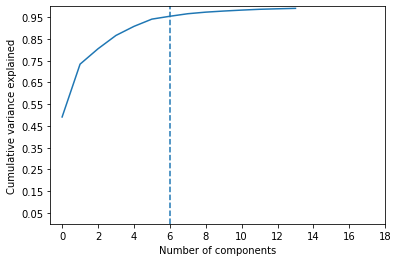

In [35]:
pca = PCA(n_components = .99,svd_solver='full')
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance explained')
plt.yticks(np.arange(0.05,1.1,step=.1))
plt.xticks(np.arange(0,20,step=2))
plt.axvline(x=6,linestyle='--')
plt.ylim(0,1)

In [36]:
pca = PCA(n_components=6)
princ_comps = pca.fit_transform(data)
data_pca = pd.DataFrame(princ_comps, columns = ['PC'+str(i) for i in range(1,pca.n_components_+1)])

**Z-Scale PC's**

In [37]:
pca_mean = data_pca.mean()
pca_sd = data_pca.std()
data_pca = (data_pca - pca_mean) / pca_sd
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,4.648895e-17,-1.094557e-15,1.221844e-16,-7.182072e-17,-6.873658e-18,-1.269519e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.423878e-02,-1.387192e+02,-4.465509e+02,-3.631831e+02,-3.499268e+02,-3.352533e+02
25%,-2.844246e-02,-6.242243e-02,-7.041943e-03,-8.103322e-02,-5.505849e-02,-3.206241e-02
50%,-1.044346e-02,-2.825168e-02,1.778059e-03,-3.531655e-03,-1.110122e-02,-1.196998e-03
75%,3.780849e-04,4.758918e-03,1.667828e-02,3.730557e-02,1.083306e-02,5.639529e-02
max,8.006021e+02,5.359121e+02,4.807969e+02,4.084298e+02,4.391587e+02,4.292597e+02


In [38]:
#mean is 0, sd is 1
#data is ready for algorithms

**Model 1 (z-score outliers)**

In [39]:
p=2
one_over_p = 1/p
score1 = (((data_pca).abs()**p).sum(axis=1))**one_over_p

**Model 2 (autoencoder error)**

In [40]:
#placeholder for input
data_in = Input(shape=(6,))

#dimensions for encoded data
encoded_dim = 3

In [41]:
#encoded representation of the data
encoded = Dense(encoded_dim,activation='tanh')(data_in)

In [42]:
#reconstruction of the input
decoded = Dense(6,activation='tanh')(encoded)

In [43]:
#maps input data to reconstructed data
autoencoder = Model(data_in,decoded)

In [44]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [45]:
autoencoder.fit(data_pca,data_pca,epochs=5,shuffle=True,validation_data=(data_pca,data_pca))

Epoch 1/5
33469/33469 [==============================] - 49s 1ms/step - loss: 0.9582 - val_loss: 0.9758
Epoch 2/5
33469/33469 [==============================] - 42s 1ms/step - loss: 0.6459 - val_loss: 0.9755
Epoch 3/5
33469/33469 [==============================] - 39s 1ms/step - loss: 0.9884 - val_loss: 0.9748
Epoch 4/5
33469/33469 [==============================] - 42s 1ms/step - loss: 0.8632 - val_loss: 0.9745
Epoch 5/5
33469/33469 [==============================] - 40s 1ms/step - loss: 1.4569 - val_loss: 0.9742


In [46]:
pca_out = autoencoder.predict(data_pca)
error = pca_out - data_pca

p=2
one_over_p = 1/p
score2 = ((error.abs()**p).sum(axis=1))**one_over_p

**Final Score (average ranking of scores 1 and 2)**

In [47]:
scores = pd.DataFrame(score1)
scores.columns = ['score1']
scores['score2'] = score2
scores['score1 rank'] = scores['score1'].rank()
scores['score2 rank'] = scores['score2'].rank()
scores['final'] = (scores['score1 rank'] + scores['score2 rank'])/2

(0.1, 2142747.525661616)

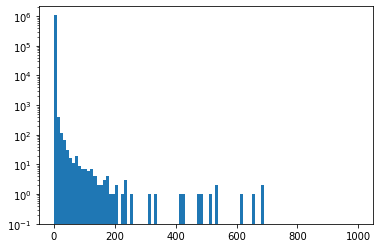

In [48]:
#score 1 distribution

plt.hist(score1,bins=100,range=(0,1000))
plt.yscale('log')
plt.ylim(ymin=.1)

(0.1, 2142987.171624099)

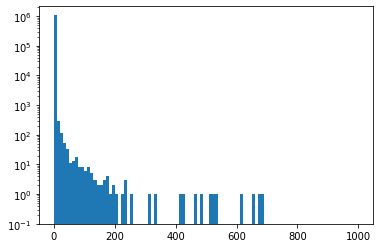

In [49]:
#score 2 distribution

plt.hist(score2,bins=100,range=(0,1000))
plt.yscale('log')
plt.ylim(ymin=.1)

/Users/alekcarlson/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='final', ylabel='Density'>

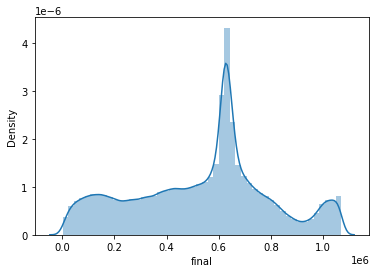

In [50]:
#final score distribution

sns.distplot(scores['final'])

In [51]:
scores.head()

,score1,score2,score1 rank,score2 rank,final
0,0.571141,0.464826,1046560.0,1059984.0,1053272.0
1,24.684914,23.045737,1070739.0,1070739.0,1070739.0
2,0.152792,0.013979,726630.0,133247.0,429938.5
3,0.169596,0.087048,787272.0,971358.0,879315.0
4,30.244380,29.278166,1070777.0,1070790.0,1070783.5


In [52]:
#professor's approach to get top 20 fraudulent records, but I think this is what is causing errors for people

#top_records = scores.sort_values(['final'], ascending = False).head(20).index
#top_records

**Creating final submission**

In [53]:
raw_data.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [54]:
data_with_scores = raw_data.copy()

In [55]:
data_with_scores['score1_rank'] = scores['score1 rank']
data_with_scores['score2_rank'] = scores['score2 rank']
data_with_scores['final_score'] = scores['final']

In [56]:
data_with_scores.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1_rank,score2_rank,final_score
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,1046560.0,1059984.0,1053272.0
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,1070739.0,1070739.0,1070739.0
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,726630.0,133247.0,429938.5
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,787272.0,971358.0,879315.0
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,1070777.0,1070790.0,1070783.5


In [57]:
top20 = data_with_scores.sort_values(['final_score'], ascending = False).head(20)

In [58]:
top20

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1_rank,score2_rank,final_score
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157,95,NaN,1.0,2.930000e+06,1.318500e+06,1.318500e+06,0.000000e+00,0.000000e+00,NaN,86-55 BROADWAY,11373.0,NaN,1,1,1.201200e+06,1.201200e+06,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1070994.0,1070994.0,1070994.0
776305,776306,4080100001,4,8010,1,NaN,TONY CHEN,Q9,4,6,1,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,SHORE ROAD,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1070993.0,1070993.0,1070993.0
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117,108,NaN,NaN,4.326304e+09,1.946837e+09,1.946837e+09,1.946837e+09,1.946837e+09,2231.0,FLATBUSH AVENUE,NaN,X1,0,0,8.484847e+08,8.484847e+08,8.484847e+08,8.484847e+08,NaN,FINAL,2010/11,AC-TR,1070992.0,1070992.0,1070992.0
585117,585118,4004200001,4,420,1,NaN,NEW YORK CITY ECONOMI,O3,4,298,402,NaN,20.0,3.443400e+06,1.549530e+06,1.549530e+06,0.000000e+00,0.000000e+00,NaN,28-10 QUEENS PLAZA SOUTH,11101.0,X1,1,1,1.585494e+06,1.585494e+06,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1070991.0,1070991.0,1070991.0
1067359,1067360,5078530085,5,7853,85,NaN,NaN,B2,1,1,1,NaN,2.0,8.360000e+05,2.880000e+04,5.016000e+04,0.000000e+00,0.000000e+00,NaN,20 EMILY COURT,10307.0,NaN,36,45,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1070990.0,1070990.0,1070990.0
230595,230596,2049910126,2,4991,126,NaN,NaN,V0,1B,1,1,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,BELL AVENUE,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1070989.0,1070989.0,1070989.0
85885,85886,1012540010,1,1254,10,NaN,PARKS AND RECREATION,Q1,4,4000,150,NaN,1.0,7.021400e+07,3.145500e+07,3.159630e+07,3.145500e+07,3.159630e+07,2231.0,JOE DIMAGGIO HIGHWAY,NaN,X1,8,8,2.813400e+07,2.826018e+07,2.813400e+07,2.826018e+07,NaN,FINAL,2010/11,AC-TR,1070988.0,1070988.0,1070988.0
585438,585439,4004590005,4,459,5,NaN,11-01 43RD AVENUE REA,H9,4,94,165,NaN,10.0,3.712000e+06,2.520000e+05,1.670400e+06,0.000000e+00,1.418400e+06,1986.0,11-01 43 AVENUE,11101.0,NaN,1,1,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1070987.0,1070987.0,1070987.0
750815,750816,4066610005E,4,6661,5,E,M FLAUM,V0,1B,1,1,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,VLEIGH PLACE,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1070986.0,1070986.0,1070986.0
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910,0,NaN,3.0,3.740199e+08,1.792809e+09,4.668309e+09,1.792809e+09,4.668309e+09,2198.0,154-68 BROOKVILLE BOULEVARD,11422.0,X4,0,0,1.644454e+09,4.501180e+09,1.644454e+09,4.501180e+09,NaN,FINAL,2010/11,AC-TR,1070985.0,1070985.0,1070985.0


In [59]:
#top20.to_csv('top20_alekcarlson.csv',index=False)

**Comparing the conflicting results**

In [75]:
prof_top_records = scores.sort_values(['final'], ascending = False).head(20).index
prof_topdf = raw_data.loc[prof_top_records]
prof_topdf

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157,95,NaN,1.0,2.930000e+06,1.318500e+06,1.318500e+06,0.000000e+00,0.000000e+00,NaN,86-55 BROADWAY,11373.0,NaN,1,1,1.201200e+06,1.201200e+06,NaN,NaN,NaN,FINAL,2010/11,AC-TR
776305,776306,4080100001,4,8010,1,NaN,TONY CHEN,Q9,4,6,1,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,SHORE ROAD,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117,108,NaN,NaN,4.326304e+09,1.946837e+09,1.946837e+09,1.946837e+09,1.946837e+09,2231.0,FLATBUSH AVENUE,NaN,X1,0,0,8.484847e+08,8.484847e+08,8.484847e+08,8.484847e+08,NaN,FINAL,2010/11,AC-TR
585117,585118,4004200001,4,420,1,NaN,NEW YORK CITY ECONOMI,O3,4,298,402,NaN,20.0,3.443400e+06,1.549530e+06,1.549530e+06,0.000000e+00,0.000000e+00,NaN,28-10 QUEENS PLAZA SOUTH,11101.0,X1,1,1,1.585494e+06,1.585494e+06,NaN,NaN,NaN,FINAL,2010/11,AC-TR
1067359,1067360,5078530085,5,7853,85,NaN,NaN,B2,1,1,1,NaN,2.0,8.360000e+05,2.880000e+04,5.016000e+04,0.000000e+00,0.000000e+00,NaN,20 EMILY COURT,10307.0,NaN,36,45,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
230595,230596,2049910126,2,4991,126,NaN,NaN,V0,1B,1,1,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,BELL AVENUE,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
85885,85886,1012540010,1,1254,10,NaN,PARKS AND RECREATION,Q1,4,4000,150,NaN,1.0,7.021400e+07,3.145500e+07,3.159630e+07,3.145500e+07,3.159630e+07,2231.0,JOE DIMAGGIO HIGHWAY,NaN,X1,8,8,2.813400e+07,2.826018e+07,2.813400e+07,2.826018e+07,NaN,FINAL,2010/11,AC-TR
585438,585439,4004590005,4,459,5,NaN,11-01 43RD AVENUE REA,H9,4,94,165,NaN,10.0,3.712000e+06,2.520000e+05,1.670400e+06,0.000000e+00,1.418400e+06,1986.0,11-01 43 AVENUE,11101.0,NaN,1,1,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
750815,750816,4066610005E,4,6661,5,E,M FLAUM,V0,1B,1,1,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,VLEIGH PLACE,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910,0,NaN,3.0,3.740199e+08,1.792809e+09,4.668309e+09,1.792809e+09,4.668309e+09,2198.0,154-68 BROOKVILLE BOULEVARD,11422.0,X4,0,0,1.644454e+09,4.501180e+09,1.644454e+09,4.501180e+09,NaN,FINAL,2010/11,AC-TR
